In [1]:

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import nltk
# Import utility libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
# Import libraries for text manipulation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# Import modules for evaluation purposes
# Import libraries for predcton
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score

from wordcloud import WordCloud
#from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("NLP_train.csv")
test_file = pd.read_csv("NLP_test.csv")

In [3]:
target = data.target
data.drop(["location","keyword","id","target"],axis = 1,inplace = True)

In [4]:
len(target)

7613

In [5]:
##Data Cleaning
import re
import string

In [6]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
round1 = lambda x: clean_text_round1(x)


In [7]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data.text.apply(round1))
data_clean.iloc[3],data.iloc[3]

(text     people receive wildfires evacuation orders in...
 Name: 3, dtype: object,
 text    13,000 people receive #wildfires evacuation or...
 Name: 3, dtype: object)

In [8]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [9]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.text.apply(round2))
data_clean.iloc[3],data.iloc[3]

(text     people receive wildfires evacuation orders in...
 Name: 3, dtype: object,
 text    13,000 people receive #wildfires evacuation or...
 Name: 3, dtype: object)

In [10]:
##removing none-english words from the data
words = set(nltk.corpus.words.words())
for idx,i in enumerate(data_clean.text):
    text = nltk.wordpunct_tokenize(i)
    for j in text:
        if j not in words:
            data_clean.text[idx] = data_clean.text[idx].replace(f"{j}","  ")
        

In [11]:
len(words)

235892

In [12]:
data_clean

,text
0,our are the reason of this earthquake may ...
1,forest fire near la canada
2,all to shelter in place are being notifi...
3,people receive evacuation in
4,just got sent this photo from ruby as smoke...
...,...
7608,two giant holding a bridge collapse into ne...
7609,the out of control wild in even in...
7610,s of volcano
7611,police investigating after an with a car...


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean["text"], target , test_size=0.20, random_state=0)

In [14]:
print('X Train Size:',X_train.shape)
print('X Test Size:',X_test.shape)

X Train Size: (6090,)
X Test Size: (1523,)


In [15]:
count_vectorizer = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)
train = count_vectorizer.fit_transform(X_train.values.astype('U'))   # "U" = Unicode string
test = count_vectorizer.transform(X_test.values.astype('U'))

In [16]:
def plot_confussion_matrix(y_test, y_pred):
    #Plot the confussion matrix for the target labels and predictions 
    cm = confusion_matrix(y_test, y_pred)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm)
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

In [18]:
def plot_roc_curve(y_test, y_pred):
    ####Plot the ROC curve for the target labels and predictions
    ##to summorize all of the confusion matrices that each threshhold produces
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Creating and traning Models

train score: 0.8449917898193761
test score: 0.7774130006565988
              precision    recall  f1-score   support

           0    0.79377   0.83409   0.81343       886
           1    0.75169   0.69859   0.72417       637

    accuracy                        0.77741      1523
   macro avg    0.77273   0.76634   0.76880      1523
weighted avg    0.77617   0.77741   0.77609      1523



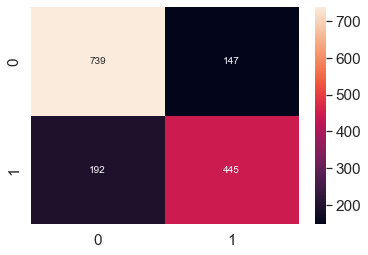

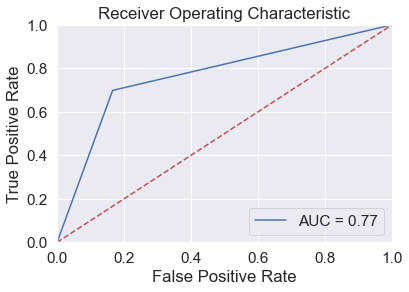

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
"""" Naive Bayes """
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train, y_train)
print("train score:", model.score(train, y_train))
print("test score:", model.score(test, y_test))
# Predicting the Test set results
y_pred = model.predict(test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

###Predicting for  test_data using Naive Bayes model:


In [20]:
test_file.drop(["id","keyword","location"],axis = 1, inplace = True)

In [21]:
test_data_clean = pd.DataFrame(test_file.text.apply(round1))
test_data_clean = pd.DataFrame(test_file.text.apply(round1))

In [22]:
y_pred_test = model.predict(count_vectorizer.transform(test_data_clean.text.values.astype('U')))

In [23]:
y_pred_test.shape

(3263,)

"""Spport Vector Machine Classifier"""

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [25]:
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']}
model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1).fit(train,y_train)

              precision    recall  f1-score   support

           0    0.76622   0.90632   0.83040       886
           1    0.82526   0.61538   0.70504       637

    accuracy                        0.78464      1523
   macro avg    0.79574   0.76085   0.76772      1523
weighted avg    0.79092   0.78464   0.77797      1523



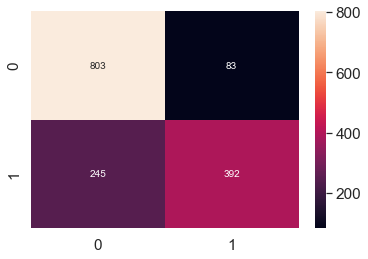

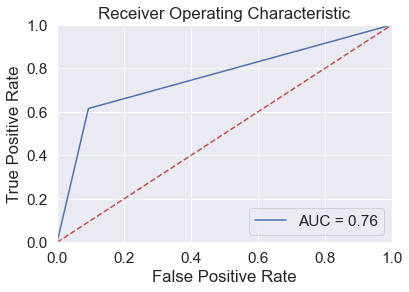

In [26]:
y_pred = model.predict(test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

XGBoost classifier

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score


def f1_metric(ytrue,preds):
    ''' Return the F1 Score value for the preds and true values, ytrue '''
    return 'f1_score', f1_score((preds>=0.5).astype('int'), ytrue, average='macro'), True

params = {
    'learning_rate': 0.06,
    'n_estimators': 1500,
    'colsample_bytree': 0.5,
    'metric': 'f1_score'
}

full_clf = LGBMClassifier(**params)

# Fit or train the xgboost model
full_clf.fit(train.astype(np.float32), y_train, eval_set=[(train.astype(np.float32), y_train), (test.astype(np.float32), y_test)],
             verbose=400, eval_metric=f1_metric)
#Show the results
print("train score:", full_clf.score(train.astype(np.float32), y_train))
print("test score:", full_clf.score(test.astype(np.float32), y_test))


C:\Users\amoha\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[400]	valid_0's f1_score: 0.849243	valid_1's f1_score: 0.757286
[800]	valid_0's f1_score: 0.889273	valid_1's f1_score: 0.754954
[1200]	valid_0's f1_score: 0.913193	valid_1's f1_score: 0.758652
train score: 0.925615763546798
test score: 0.7669074195666448


              precision    recall  f1-score   support

           0    0.76622   0.90632   0.83040       886
           1    0.82526   0.61538   0.70504       637

    accuracy                        0.78464      1523
   macro avg    0.79574   0.76085   0.76772      1523
weighted avg    0.79092   0.78464   0.77797      1523



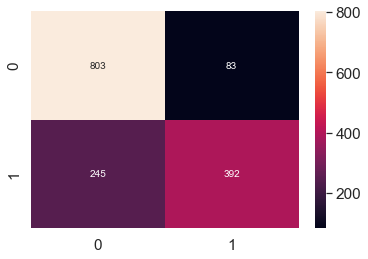

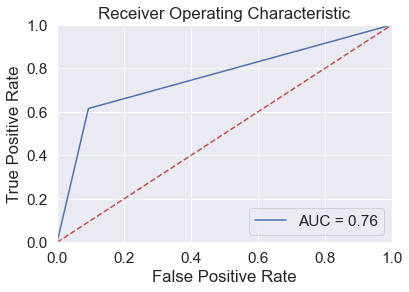

In [28]:
# Predicting the Test set results
Y_pred = full_clf.predict(test.astype(np.float32))

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [33]:
data

,text,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [32]:
data["label"] = target

In [54]:
# visualize the data on a WordCloud
def make_word_cloud(label):
  words = ''
  for msg in data[data["label"] == label]["text"]:
        
    #print(msg)    
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=800, height=800).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

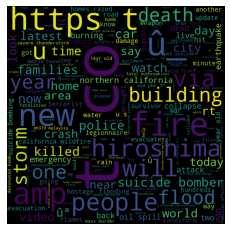

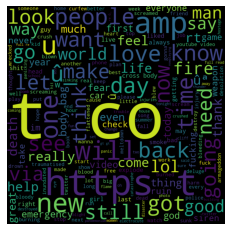

(None, None)

In [55]:
make_word_cloud(1),make_word_cloud(0)

Document-Term Matrix

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index

C:\Users\amoha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aba,abandon,abandoned,ability,abject,ablaze,able,aboard,abomination,...,zodiac,zombie,zone,zoom,ªs,ªt,åê,ênews,ïyou,ûtschool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
a = []
for i in data_dtm.columns:
    if i not in words:
        a.append(i)

In [19]:
for i in a:
    data_dtm.drop([f"{i}"], inplace = True, axis = 1)

In [48]:
data_dtm

,aa,aba,abandon,abandoned,ability,abject,ablaze,able,aboard,abomination,...,zar,zeal,zero,zimbabwe,zip,zipper,zodiac,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
